In [1]:
import numpy as np
import matplotlib.pyplot as plt
from micrograd.comp_graph import draw_dot
from micrograd.nn import MLP

%matplotlib inline

Design and train a two layer neural network (no packages for backpropagation) to approximate a function f : X → Y within the domain
[−1, 1] whose sample data points are given by:

In [2]:
X = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

y = [-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321]

print("X shape:", len(X))
print("y shape:", len(y))


X shape: 21
y shape: 21


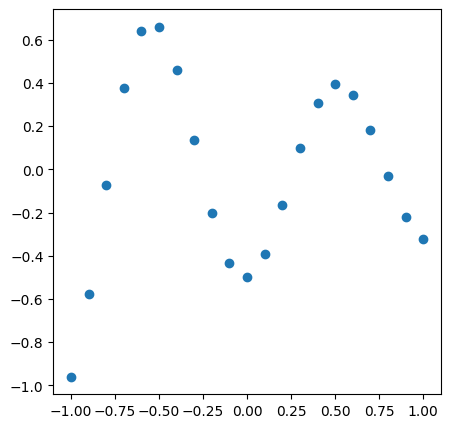

In [3]:
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X, y)
plt.show()

In [4]:
# initialize a model
model = MLP(1, [12, 36, 1], nonlin='relu')
print("number of parameters", len(model.parameters()))
print(model)

number of parameters 529
MLP of [
Layer of [reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1), reluNeuron(in:1)],
Layer of [reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12), reluNeuron(in:12)],
Layer of [linearNeuron(in:36)]
]


In [5]:
def loss():
    """Forward pass, then return loss and accuracy."""
    # Forward pass
    output = [model([x]) for x in X]

    # Calculate MSE loss
    mse_losses = [(out - target)**2 for out, target in zip(output, y)]
    mse = sum(mse_losses) * (1.0 / len(mse_losses))

    return mse

mse = loss()
print(f"MSE: {mse}")

MSE: Value(data=1.354117523822896, grad=0)


In [6]:
tr_loss = []

In [15]:
# Training loop
epochs = 600
lr = 0.1

for epoch in range(epochs+1):
    total_loss = loss()
    tr_loss.append(total_loss.data)
    print(f'epoch {epoch} | loss={total_loss.data:.4f}')
    
    if epoch == epochs:
        break

    model.zero_grad()
    total_loss.backward()
    
    for p in model.parameters():
        p.data -= p.grad * lr

epoch 0 | loss=0.0051
epoch 1 | loss=0.0053
epoch 2 | loss=0.0053
epoch 3 | loss=0.0056
epoch 4 | loss=0.0065
epoch 5 | loss=0.0059
epoch 6 | loss=0.0057
epoch 7 | loss=0.0052
epoch 8 | loss=0.0049
epoch 9 | loss=0.0044
epoch 10 | loss=0.0042
epoch 11 | loss=0.0036
epoch 12 | loss=0.0034
epoch 13 | loss=0.0030
epoch 14 | loss=0.0029
epoch 15 | loss=0.0025
epoch 16 | loss=0.0024
epoch 17 | loss=0.0021
epoch 18 | loss=0.0020
epoch 19 | loss=0.0020
epoch 20 | loss=0.0019
epoch 21 | loss=0.0018
epoch 22 | loss=0.0018
epoch 23 | loss=0.0018
epoch 24 | loss=0.0017
epoch 25 | loss=0.0017
epoch 26 | loss=0.0016
epoch 27 | loss=0.0016
epoch 28 | loss=0.0016
epoch 29 | loss=0.0015
epoch 30 | loss=0.0015
epoch 31 | loss=0.0015
epoch 32 | loss=0.0014
epoch 33 | loss=0.0014
epoch 34 | loss=0.0014
epoch 35 | loss=0.0014
epoch 36 | loss=0.0013
epoch 37 | loss=0.0013
epoch 38 | loss=0.0013
epoch 39 | loss=0.0013
epoch 40 | loss=0.0013
epoch 41 | loss=0.0012
epoch 42 | loss=0.0012
epoch 43 | loss=0.001

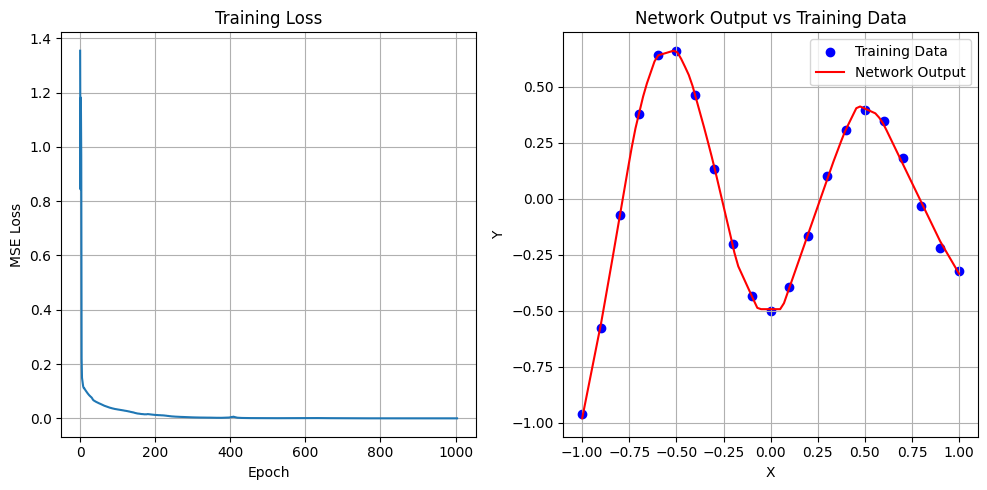

In [16]:
plt.figure(figsize=(15, 5))

# Plot 1: visualize loss
plt.subplot(131)
plt.plot(tr_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)


# Plot 2: Compare original and approximated function
plt.subplot(132)

# Generate smooth curve for visualization
X_test = np.linspace(-1, 1, 100)
y_pred = [model([x]).data for x in X_test]

plt.scatter(X, y, c='blue', label='Training Data')
plt.plot(X_test, y_pred, 'r-', label='Network Output')
plt.title('Network Output vs Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig(f'images/loss_q2_epochs_{epochs}.svg', dpi=300)
plt.show()

In [ ]:
# visualize the computational graph
dot = draw_dot(total_loss)
# dot.render('images/gout_q1') # saving the graph as a svg file
dot